In [2]:
%pip install wordcloud

  Using cached wordcloud-1.9.4.tar.gz (27.6 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build wordcloud
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Building wheel for wordcloud (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [44 lines of output]
      C:\Users\visis\AppData\Local\Temp\pip-build-env-3oez97s7\overlay\Lib\site-packages\setuptools\config\_apply_pyprojecttoml.py:82: SetuptoolsDeprecationWarning: `project.license` as a TOML table is deprecated
      !!
      
              ********************************************************************************
              Please use a simple string containing a SPDX expression for `project.license`. You can also use `project.license-files`. (Both options available on setuptools>=77.0.0).
      
              By 2026-Feb-18, you need to update your project and remove deprecated calls
              or your builds will no longer be supported.
      
              See https://packaging.python.org/en/latest/guides/writing-pyproject-toml/#license for details.
              ***********************************************

In [4]:
#Creating the setup 
import pandas as pd 
import numpy as numpy
import seaborn as sns
import matplotlib.pyplot as plt 

import warnings 
warnings.filterwarnings('ignore')

#Setting the style 
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

#Getting the settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)




In [6]:
#Loading the dataset 
#DATASET SETUP 

df = pd.read_csv('../data/raw_news_data.csv')

#Now printing all the description and everything for the dataset 
#Finding head
print("Head of the dataset: ", df.head())

#Describing the data
print("The description of the dataset is: ", df.describe())

#Finding the information of the dataset 
print("The information of the dataset: ", df.info())

#Findign shape of the dataset
print("The shape of the dataset is: ", df.shape)

#Finding the size of the dataset
print("The size of the dataset is: ", df.size)

#Gettings the number of rows and columns 
rows, columns = df.shape

print(f"The dataset has {rows} rows and {columns} columns.")

#Getting number and name of featurs 
features = df.columns.tolist()
len(features)

print("The number of features in the dataset is: ", len(features))
print("The features in the dataset are: ", features)    


#Finding the number of datatypes in the data 
datatypes = df.dtypes

print("The datatypes in the dataset are: ", datatypes)




Head of the dataset:                                                                                              title  \
0  WIRED Roundup: Fandom in Politics, Zuckerberg’s Illegal School, and Nepal’s Discord Revolution   
1                    The feud between Ben Shapiro and Nick Fuentes is now mainstream GOP politics   
2                                  Nancy Pelosi announces retirement after decades in US Congress   
3                                   How X's new location feature exposed big US politics accounts   
4                                  Emails highlight Jeffrey Epstein and Steve Bannon relationship   

                                                                                           description  \
0  In this episode of “Uncanny Valley,” we run through the top stories of the week and examine how ...   
1  Typically, the long-running MAGA influencer feud between white supremacist streamer Nick Fuentes...   
2           Pelosi made history as the first female S

In [7]:
#DATA PRE-PROCESSING 
#Checking missing values 
missing_values = df.isnull().sum()
print("The missing values in the dataset are: ", missing_values)
missing_values_percentage = (df.isnull().sum() / len(df)) * 100
print("The missing values percentage in the dataset are: \n", missing_values_percentage)



The missing values in the dataset are:  title           0
description     5
content         1
full_text       0
url             0
source          0
published_at    0
topic           0
collected_at    0
dtype: int64
The missing values percentage in the dataset are: 
 title           0.000000
description     0.555556
content         0.111111
full_text       0.000000
url             0.000000
source          0.000000
published_at    0.000000
topic           0.000000
collected_at    0.000000
dtype: float64


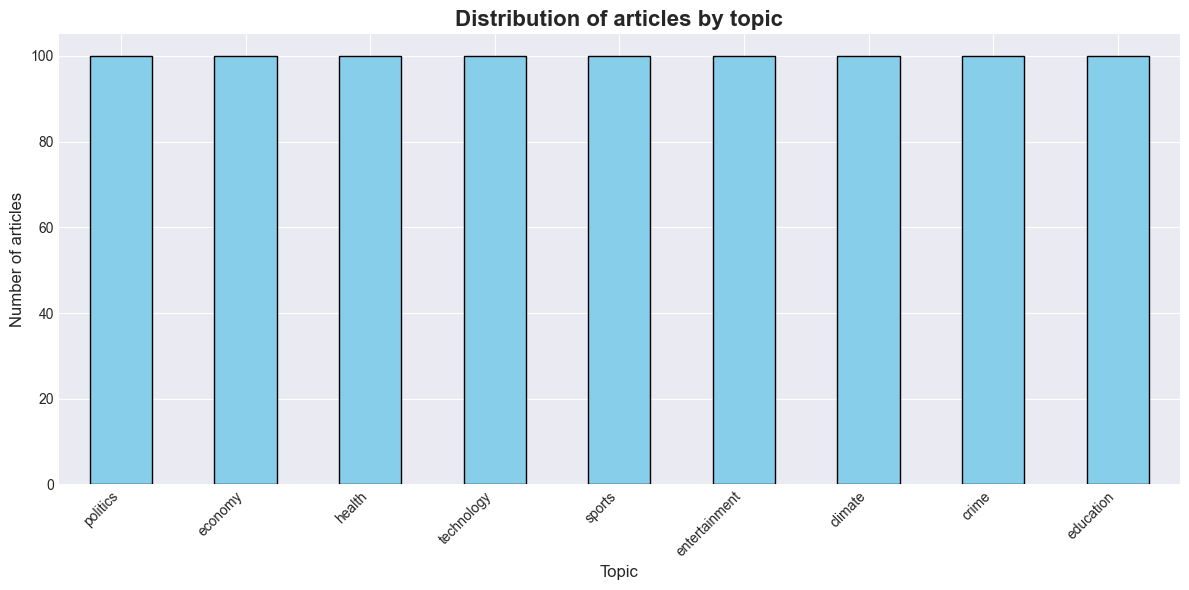


Articles per topic: 
topic
politics         100
economy          100
health           100
technology       100
sports           100
entertainment    100
climate          100
crime            100
education        100
Name: count, dtype: int64


In [8]:
#TOPIC DISTRIBUTION 
#Creating a plot to identify the typeso of topics in the news 
plt.figure(figsize=(12,6))
topic_counts = df['topic'].value_counts()
topic_counts.plot(kind='bar', color = 'skyblue', edgecolor = 'black')
plt.title('Distribution of articles by topic', fontsize=16, fontweight='bold')
plt.xlabel('Topic', fontsize=12)
plt.ylabel('Number of articles', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('../visualizations/topic_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nArticles per topic: ")
print(topic_counts)

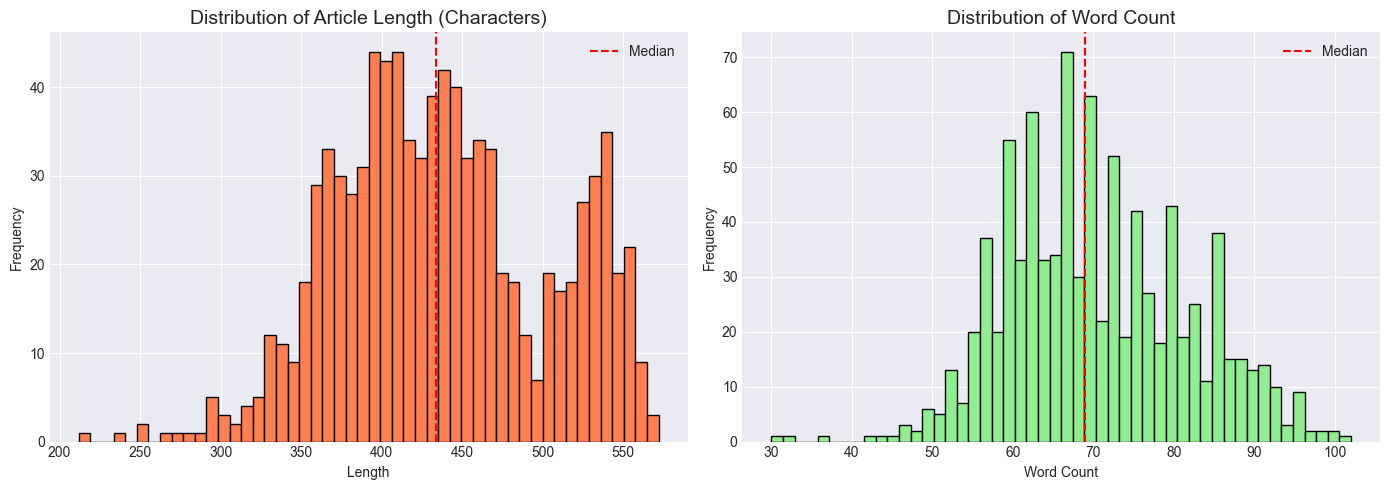

Average article length: 437 characters
Average word count: 70 words


In [9]:
#TEXT LENGTH ANALYSIS
# Cell 5: Text Length Analysis
df['text_length'] = df['full_text'].str.len()
df['word_count'] = df['full_text'].str.split().str.len()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Character length
axes[0].hist(df['text_length'].dropna(), bins=50, color='coral', edgecolor='black')
axes[0].set_title('Distribution of Article Length (Characters)', fontsize=14)
axes[0].set_xlabel('Length')
axes[0].set_ylabel('Frequency')
axes[0].axvline(df['text_length'].median(), color='red', linestyle='--', label='Median')
axes[0].legend()

# Word count
axes[1].hist(df['word_count'].dropna(), bins=50, color='lightgreen', edgecolor='black')
axes[1].set_title('Distribution of Word Count', fontsize=14)
axes[1].set_xlabel('Word Count')
axes[1].set_ylabel('Frequency')
axes[1].axvline(df['word_count'].median(), color='red', linestyle='--', label='Median')
axes[1].legend()

plt.tight_layout()
plt.savefig('../visualizations/text_length_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Average article length: {df['text_length'].mean():.0f} characters")
print(f"Average word count: {df['word_count'].mean():.0f} words")

In [10]:
#Downloading NLTK to check if it works 
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('opinion_lexicon')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\visis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\visis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\visis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\visis\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\visis\AppData\Roaming\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


True

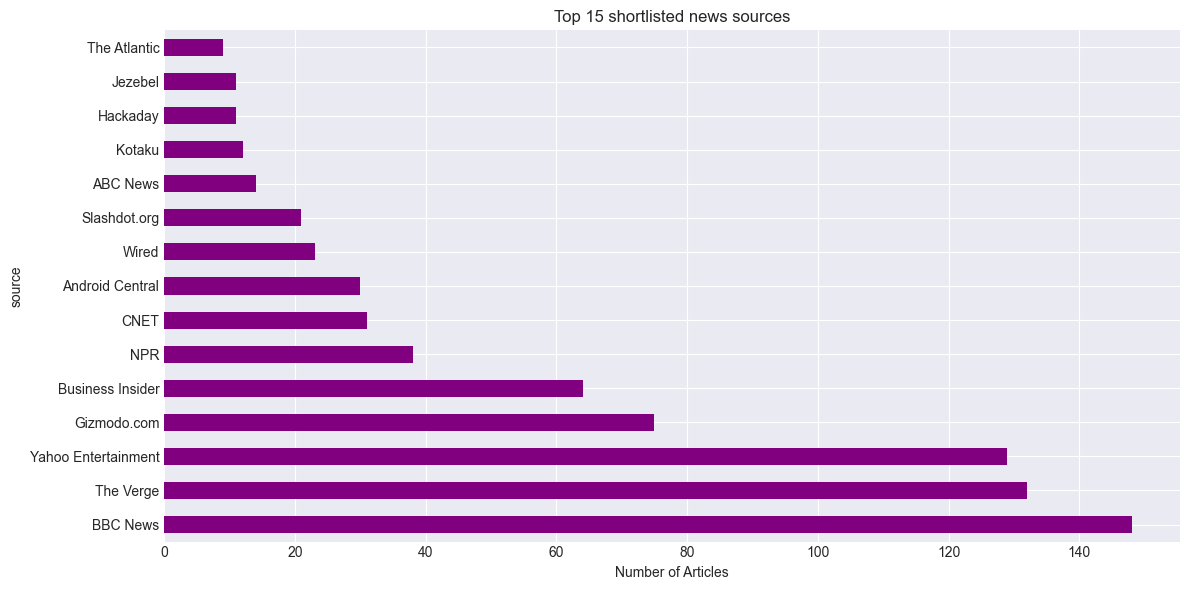

In [11]:
#SOURCE ANALYSIS 
#Checkign which ones are the top sources 
top_sources = df['source'].value_counts().head(15)
plt.figure(figsize=(12,6))
top_sources.plot(kind='barh', color='purple')
plt.title("Top 15 shortlisted news sources")
plt.xlabel("Number of Articles")
plt.tight_layout()
plt.savefig('../visualizations/source_distribution.png', dpi=300)
plt.show()



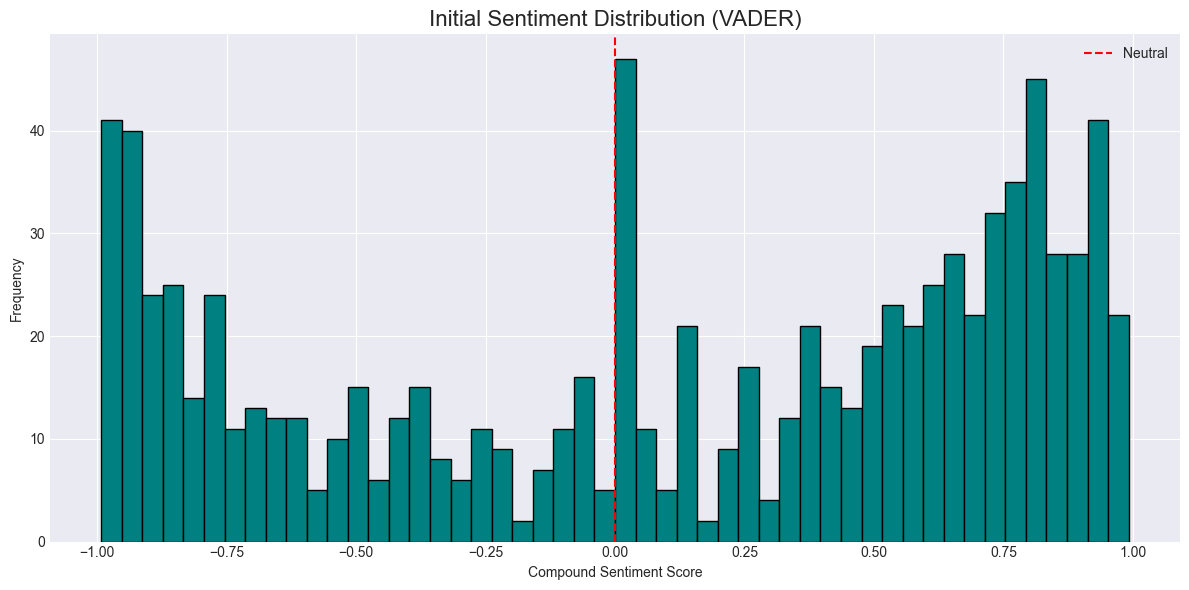

Positive articles (>0.3): 430
Negative articles (<-0.3): 288
Neutral articles: 182


In [12]:
#INITIAL SENTIMENT ANALYSIS 
#Doing the sentiment analysos, here it will include the feature selection and engineering 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

df['vader_compound'] = df['full_text'].apply(
    lambda x: vader.polarity_scores(str(x))['compound'] if pd.notna(x) else 0
)

#Creating the sentiment analysis distribution 
plt.figure(figsize=(12, 6))
plt.hist(df['vader_compound'], bins=50, color='teal', edgecolor='black')
plt.title('Initial Sentiment Distribution (VADER)', fontsize=16)
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.axvline(x=0, color='red', linestyle='--', label='Neutral')
plt.legend()
plt.tight_layout()
plt.savefig('../visualizations/initial_sentiment_distribution.png', dpi=300)
plt.show()

print(f"Positive articles (>0.3): {(df['vader_compound'] > 0.3).sum()}")
print(f"Negative articles (<-0.3): {(df['vader_compound'] < -0.3).sum()}")
print(f"Neutral articles: {((df['vader_compound'] >= -0.3) & (df['vader_compound'] <= 0.3)).sum()}")


<Figure size 1200x600 with 0 Axes>

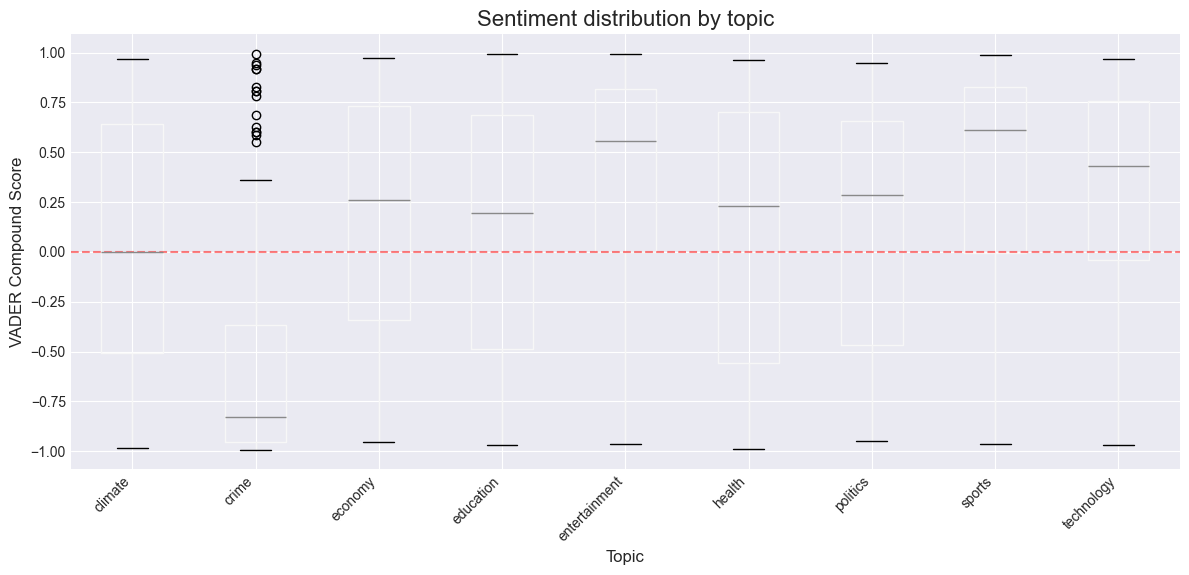


Average Sentiment by Topic:
topic
crime           -0.510420
climate          0.020289
health           0.072735
education        0.101222
politics         0.103850
economy          0.166910
technology       0.271467
sports           0.319782
entertainment    0.360789
Name: vader_compound, dtype: float64


In [13]:
#Creating sentiment analysis based on each topic 
#Creating the plot 

plt.figure(figsize=(12,6))
df.boxplot(column='vader_compound', by='topic', figsize=(12,6))
plt.title("Sentiment distribution by topic", fontsize=16)
plt.suptitle('')
plt.xlabel('Topic', fontsize=12)
plt.ylabel('VADER Compound Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.axhline(y=0, color='red',linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('../visualizations/sentiment_by_topic.png', dpi=300, bbox_inches='tight')
plt.show()

# Show average sentiment per topic
sentiment_by_topic = df.groupby('topic')['vader_compound'].mean().sort_values()
print("\nAverage Sentiment by Topic:")
print(sentiment_by_topic)

In [2]:
#Wordcloud by topics 
%pip install wordcloud
from wordcloud import WordCloud

fig, axes = plt.subplots(3,3, figsize=(18,18))
axes = axes.ravel()

for idx, topic in enumerate(df['topic'].unique()):
    if idx < len(axes):
        # Get text for this topic
        text = ' '.join(df[df['topic'] == topic]['full_text'].dropna())
        
        # Generate word cloud
        wordcloud = WordCloud(
            width=600, 
            height=400, 
            background_color='white',
            colormap='viridis',
            max_words=100
        ).generate(text)
        
        axes[idx].imshow(wordcloud, interpolation='bilinear')
        axes[idx].set_title(f'{topic.upper()}', fontsize=14, fontweight='bold')
        axes[idx].axis('off')

plt.tight_layout()
plt.savefig('../visualizations/wordclouds_by_topic.png', dpi=300, bbox_inches='tight')
plt.show()


  error: subprocess-exited-with-error
  
  × Building wheel for wordcloud (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [44 lines of output]
      C:\Users\visis\AppData\Local\Temp\pip-build-env-p16uep50\overlay\Lib\site-packages\setuptools\config\_apply_pyprojecttoml.py:82: SetuptoolsDeprecationWarning: `project.license` as a TOML table is deprecated
      !!
      
              ********************************************************************************
              Please use a simple string containing a SPDX expression for `project.license`. You can also use `project.license-files`. (Both options available on setuptools>=77.0.0).
      
              By 2026-Feb-18, you need to update your project and remove deprecated calls
              or your builds will no longer be supported.
      
              See https://packaging.python.org/en/latest/guides/writing-pyproject-toml/#license for details.
              ***********************************************

  Using cached wordcloud-1.9.4.tar.gz (27.6 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build wordcloud
  Using cached wordcloud-1.9.4.tar.gz (27.6 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build wordcloud
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Building wheel for wordcloud (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [44 lines of output]
      C:\Users\visis\AppData\Local\Temp\pip-build-env-3pfbffry\overlay\Lib\site-packages\setuptools\config\_apply_pyprojecttoml.py:82: SetuptoolsDeprecationWarning: `project.license` as a TOML table is deprecated
      !!
      
              ********************************************************************************
              Please use a simple string containing a SPDX expression for `project.license`. You can also use `project.license-files`. (Both options available on setuptools>=77.0.0).
      
              By 2026-Feb-18, you need to update your project and remove deprecated calls
              or your builds will no longer be supported.
      
              See https://packaging.python.org/en/latest/guides/writing-pyproject-toml/#license for details.
              ***********************************************

ModuleNotFoundError: No module named 'wordcloud'

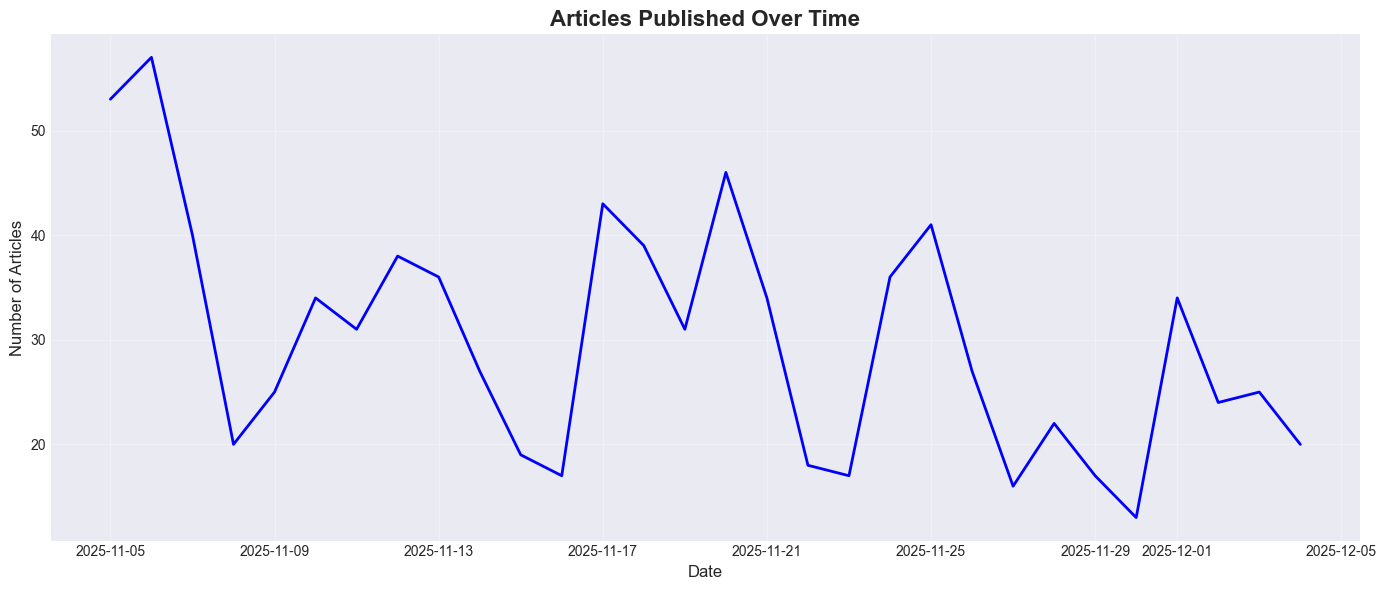

In [14]:
#TEMPORAL ANALYSIS 

df['published_at'] = pd.to_datetime(df['published_at'], errors='coerce')
df['date'] = df['published_at'].dt.date

articles_per_day = df.groupby('date').size()

plt.figure(figsize=(14, 6))
articles_per_day.plot(kind='line', color='blue', linewidth=2)
plt.title('Articles Published Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Articles', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../visualizations/temporal_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

Note: you may need to restart the kernel to use updated packages.
Missing Data Summary:
        Column  Missing_Count  Missing_Percent
1  description              5         0.555556
2      content              1         0.111111


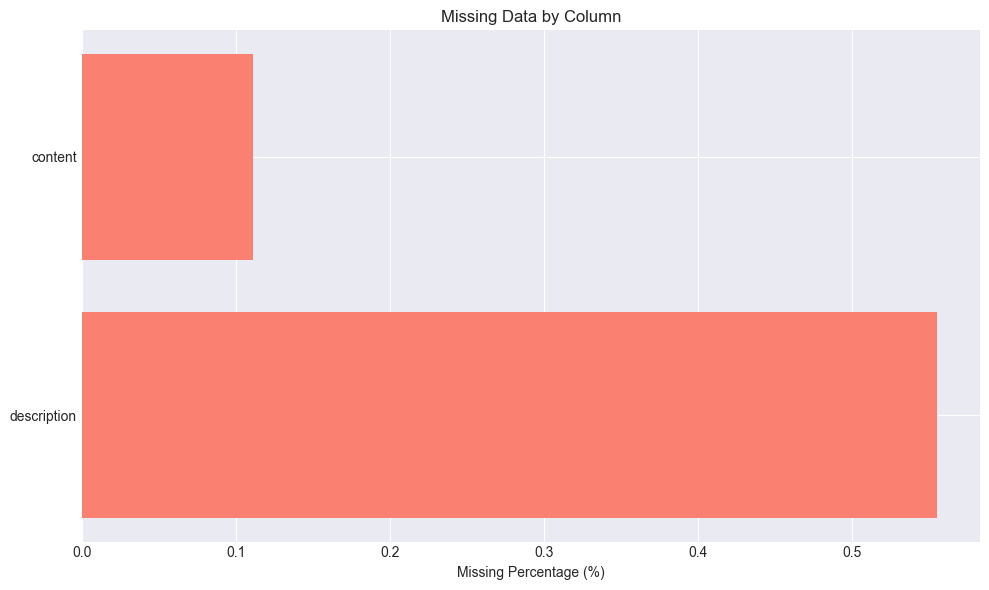

In [15]:
#NOW CHECKING MISSING VALUES 
%pip install missingno
import missingno as msno 

missing_data = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_data.index,
    'Missing_Count': missing_data.values,
    'Missing_Percent': missing_percent.values
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

print("Missing Data Summary:")
print(missing_df)

# Visualize
plt.figure(figsize=(10, 6))
plt.barh(missing_df['Column'], missing_df['Missing_Percent'], color='salmon')
plt.xlabel('Missing Percentage (%)')
plt.title('Missing Data by Column')
plt.tight_layout()
plt.savefig('../visualizations/missing_data_analysis.png', dpi=300)
plt.show()


In [16]:
#CREATING EDA SUMMARY 

eda_summary = {
    'total_articles': len(df),
    'total_topics': df['topic'].nunique(),
    'total_sources': df['source'].nunique(),
    'avg_text_length': df['text_length'].mean(),
    'avg_word_count': df['word_count'].mean(),
    'date_range': f"{df['date'].min()} to {df['date'].max()}",
    'positive_articles': (df['vader_compound'] > 0.3).sum(),
    'negative_articles': (df['vader_compound'] < -0.3).sum(),
    'neutral_articles': ((df['vader_compound'] >= -0.3) & (df['vader_compound'] <= 0.3)).sum(),
}

print("="*50)
print("EDA SUMMARY")
print("="*50)
for key, value in eda_summary.items():
    print(f"{key}: {value}")

# Save summary
import json
with open('../data/eda_summary.json', 'w') as f:
    json.dump(eda_summary, f, indent=4, default=str)
    
print("\n✓ EDA Complete! Summary saved to data/eda_summary.json")


EDA SUMMARY
total_articles: 900
total_topics: 9
total_sources: 108
avg_text_length: 437.4611111111111
avg_word_count: 70.37666666666667
date_range: 2025-11-05 to 2025-12-04
positive_articles: 430
negative_articles: 288
neutral_articles: 182

✓ EDA Complete! Summary saved to data/eda_summary.json
